# Test problem

Utility function: 
$$u = E_t\sum_{\tau=0}^{\infty}\beta^{\tau}\Big( \frac{c^{1-\sigma}_{t+\tau}-1}{1-\sigma} \Big) \quad \mathrm{with} \quad \sigma \in (0,1) \cup (1, \infty)$$

Budget constraint:
$$a_{t+1} = (1+R)a_t + z_{t} - c_t$$

where $z_t = 0.5$ if unemployed or $z_t = 1.0$ otherwise.

Probability of being unemployed $p = 0.2$.

In [1]:
from python.model import Model
import numpy as np
import matplotlib.pyplot as plt

Parameters of grid:

In [2]:
JOBS = 1                              # Numbers of jobs
CRITERION = 1e-3                      # Convergence criterion
MAXITERATIONS = 100                   # Maximal number of iterations

AUGMA = 500                           # Borrowing limit
NBA = 1000                            # Number of assets points in the grid
AMIN = 0                              # Minimal value of assets
AMAX = 10                             # Maximal value of assets

Parameters of model:

In [3]:
BETA = 0.95                           # Discount rate
R = 0.02                              # Fixed interest rate
SIGMA = 1.5                           # Utility parameter

ZSHOCKS = 2                           # Number of discrete earnings shocks
z_shock_range = np.array([1.0, 0.5])  # Discrete earnings shocks range
            
# Transition matrix
PIMATRIX = np.array([0.8, 0.2, 0.2, 0.8])
PIMATRIX = PIMATRIX.reshape(ZSHOCKS, ZSHOCKS)

o_range = [False]                     # List of possible o states for test problem
pp_range = [0]                        # List of possible PP states for test problem

Global functions:

Model class:

In [4]:
class TestModel(Model):

    def __init__(self):
        (self.AMIN, self.AMAX, self.NBA, self.AUGMA) = (AMIN, AMAX, NBA, AUGMA)
        (self.HMIN, self.NBH, self.AUGMH, self.DELTAH) = (1, 1, 1, 1)

        if self.NBA > 1:
            self.DELTAA = (self.AMAX - self.AMIN) / (self.NBA - 1)     
        else:
            self.DELTAA = 1
        
        self.JOBS = JOBS
        self.CRITERION = CRITERION
        self.MAXITERATIONS = MAXITERATIONS
        self.BETA = BETA
        self.R =  R
        self.SIGMA = SIGMA
        self.ZSHOCKS = ZSHOCKS
        self.z_shock_range = z_shock_range
        self.pp_range = pp_range
        self.o_range = o_range
        self.PIMATRIX = PIMATRIX
        
        self.a_grid = np.linspace(AMIN, AMAX, NBA)
        self.h_grid = np.linspace(1, 1, 1)

        self._size = len(self.pp_range)*len(self.o_range)*self.JOBS
        self._full_size = self.NBA*self.NBH

        dr = np.ones( (self.NBA*self.NBH, self.ZSHOCKS), dtype=int )
        v = np.zeros( (self.NBA*self.NBH, self.ZSHOCKS), dtype=float )
        self.v = [v] * ( len(pp_range)*len(o_range)*JOBS )
        self.dr = [dr] * ( len(pp_range)*len(o_range)*JOBS )      
    
    def grid_consumption(self, j, pp, h_prime, h, a_prime, a, o, z_shock):
        return (1 + self.R)*a + self.z_shock_range[z_shock] - a_prime
    
    def utility(self, c, l):
        if c == 0:
            return -np.nan
        else:
            return (c**(1 - self.SIGMA) - 1) / (1 - self.SIGMA)
    
    def show(self):
        plt.figure()
        plt.plot( self.a_grid,
                 self.a_grid[self.dr[0].
                 reshape(self.NBH, self.NBA, self.ZSHOCKS)[0, :, 0] % NBA] )
        plt.plot( self.a_grid,
                 self.a_grid[self.dr[0].
                 reshape(self.NBH, self.NBA, self.ZSHOCKS)[0, :, 1] % NBA] )
        plt.ylabel("next period asset holdings")
        plt.xlabel("asset")

        plt.figure()
        plt.plot(self.a_grid, self.v[0].
                reshape(self.NBH, self.NBA, self.ZSHOCKS)[0,:,0] )
        plt.plot(self.a_grid, self.v[0].
                reshape(self.NBH, self.NBA, self.ZSHOCKS)[0,:,1] )
        plt.ylabel("value function")
        plt.xlabel("asset")

        plt.show()

Model evaluation:

In [5]:
m = TestModel()
m.evaluate_model()

Matrix:  0; Utility matrix calculated
Matrix:  0; Iteration: 16; Distance: 0


Results:

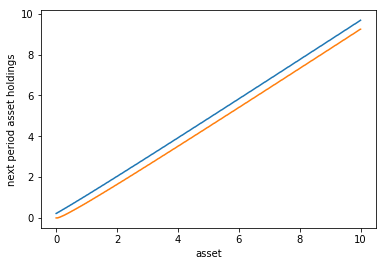

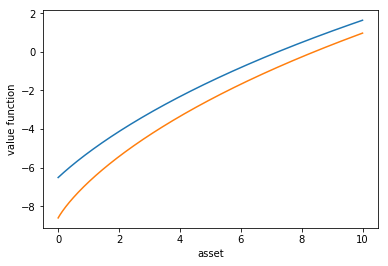

In [6]:
%matplotlib inline

m.show()